# Lab Instructions

You have been hired by James Cameron to create profiles of two characters for a reboot of the Titanic Movie: one that is most likely to survive the sinking and one that is least likely to survive.  Mr. Cameron wants this reboot to be as historically accurate as possible, so your profile of each character should be backed up with data and visualizations.

Each character profile should include information on their:
* Age, fare
* Sex
* Passenger class
* Travel companions (including both parents/children and siblings/spouse)
* Port of departure (indicated by the Embarked feature in the dataset)

For quantitative features like `Age` and `Fare`, you will need to use the `.loc` method we learned in class (or something similar) to place individuals in categories.  How you choose to do this is up to you, but make sure you explain your reasoning.

You should include at least one visualization for each element of the character profile (age, sex, passenger class, etc.) as evidence.

After you have developed your two character profiles, use your Pandas data wrangling skills to identify at least one real passenger in the dataset that fits each profile.  Print out the names of these individuals.  Look them up in [Encyclopeida Titanica](https://www.encyclopedia-titanica.org/) (or a similar resource).  

Tell Mr. Cameron at least one thing about the real passengers who fit your two character profiles that you learned from an external resource.  You need one interesting fact about a person who fits the profile of "most likely to survive" and one interesting fact about a person who fits the profile of "least likely to surivive".  



In [1]:
import pandas as pd

df = pd.read_csv('titanic_passengers.csv')



In [2]:

df.head()


print('shape:', df.shape)
print('\ninfo:')
df.info()


shape: (891, 12)

info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Approach and goals

This lab requires us to build two character profiles: one likely to survive and one likely to not survive, backed with data and visualizations.  

Plan:
- Inspect the dataset and create useful categorical fields (age groups, fare groups, and travel companions).
- Compute survival rate by Sex, Pclass, Age group, travel companions, and Embarked.
- Produce at least one visualization for each feature used in the profile.
- Choose at least one real passenger that matches each profile and print their names.
- Add an external research note with a fact about each real passenger (use Encyclopedia Titanica or similar).


In [3]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

**Interpretation — Fare**

The `describe()` output above shows the distribution of `Fare` values. Fares span a wide range, so I'll create a quartile-based fare category to better compare survival across fare levels.


C:\Users\marke\AppData\Local\Temp\ipykernel_33284\2148535326.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_age_group = df.groupby('age_group')['Survived'].mean()
C:\Users\marke\AppData\Local\Temp\ipykernel_33284\2148535326.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_companions = df.groupby(pd.cut(df['companions'], bins=[-1,0,1,3,100], labels=['alone','1_comp','2-3','4+']))['Survived'].mean()
C:\Users\marke\AppData\Local\Temp\ipykernel_33284\2148535326.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pan

Survival rate by sex:
 Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

Survival rate by passenger class (Pclass):
 Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

Survival rate by age group:
 age_group
child (0-12)           0.579710
teen (13-18)           0.428571
young adult (19-35)    0.382682
adult (36-60)          0.400000
senior (60+)           0.227273
Name: Survived, dtype: float64

Survival rate by number of travel companions:
 companions
alone     0.303538
1_comp    0.552795
2-3       0.610687
4+        0.161290
Name: Survived, dtype: float64

Survival rate by port of embarkation (Embarked):
 Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

Survival rate by fare quartile:
 fare_group
Low        0.197309
MedLow     0.303571
MedHigh    0.454955
High       0.581081
Name: Survived, dtype: float64


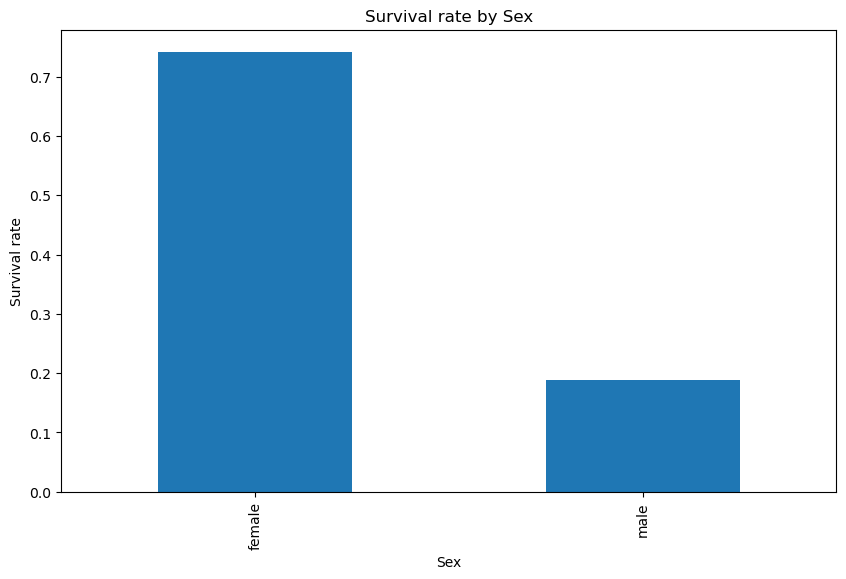

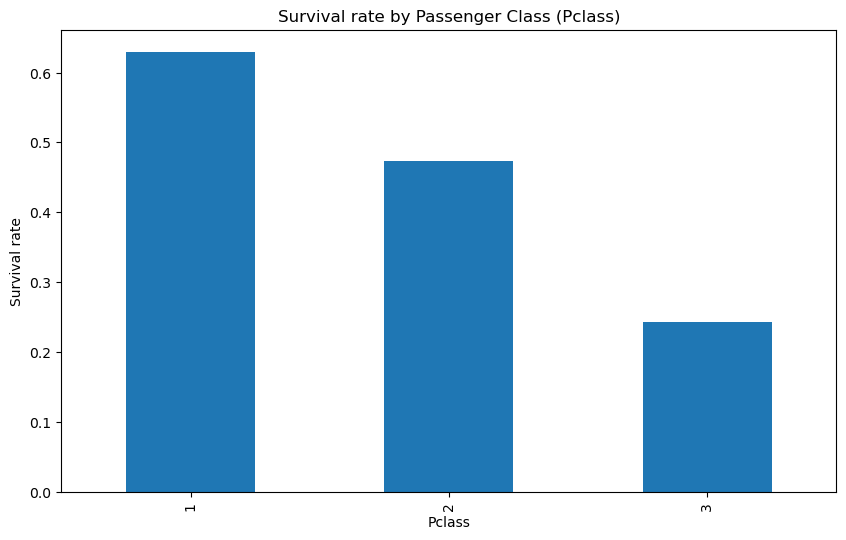

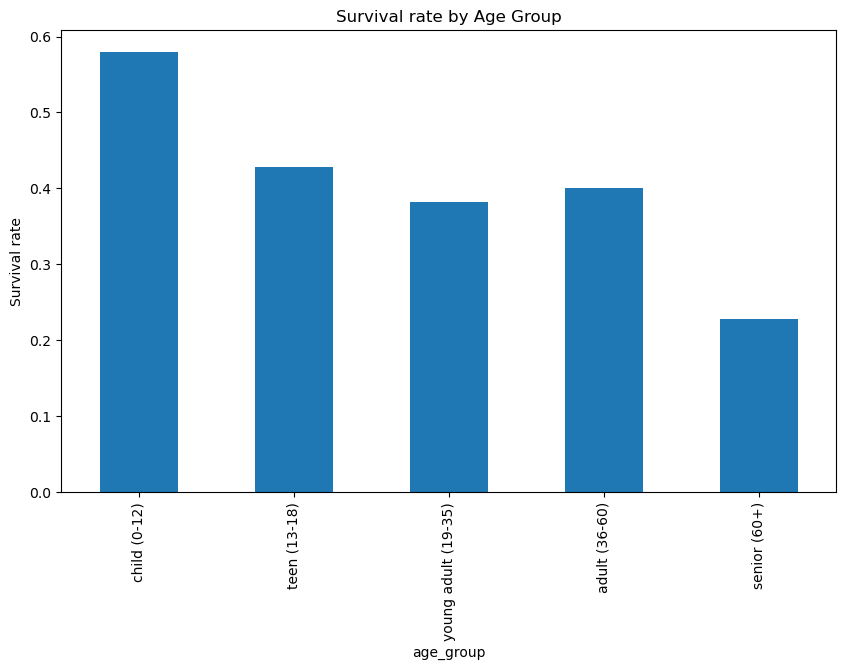

In [4]:
# feature engineering: companions, age_group, fare_group
import matplotlib.pyplot as plt

# companions = siblings/spouses + parents/children
df['companions'] = df['SibSp'] + df['Parch']

# create simple age groups (NaNs will remain NaN)
age_bins = [0, 12, 18, 35, 60, 120]
age_labels = ['child (0-12)', 'teen (13-18)', 'young adult (19-35)', 'adult (36-60)', 'senior (60+)']
df['age_group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=True)

# create quartile-based fare groups (fill missing Fare with 0 so they fall in 'Low')
df['fare_group'] = pd.qcut(df['Fare'].fillna(0), 4, labels=['Low', 'MedLow', 'MedHigh', 'High'])

# Calculate survival rates by category
survival_by_sex = df.groupby('Sex')['Survived'].mean()
survival_by_pclass = df.groupby('Pclass')['Survived'].mean()
survival_by_age_group = df.groupby('age_group')['Survived'].mean()
survival_by_companions = df.groupby(pd.cut(df['companions'], bins=[-1,0,1,3,100], labels=['alone','1_comp','2-3','4+']))['Survived'].mean()
survival_by_embarked = df.groupby('Embarked')['Survived'].mean()
survival_by_fare = df.groupby('fare_group')['Survived'].mean()

# show computed values
print('Survival rate by sex:\n', survival_by_sex)
print('\nSurvival rate by passenger class (Pclass):\n', survival_by_pclass)
print('\nSurvival rate by age group:\n', survival_by_age_group)
print('\nSurvival rate by number of travel companions:\n', survival_by_companions)
print('\nSurvival rate by port of embarkation (Embarked):\n', survival_by_embarked)
print('\nSurvival rate by fare quartile:\n', survival_by_fare)

# small visualizations (these will render in notebook) - bar charts
plt.figure(figsize=(10,6))
survival_by_sex.plot(kind='bar', title='Survival rate by Sex')
plt.ylabel('Survival rate')
plt.show()

plt.figure(figsize=(10,6))
survival_by_pclass.plot(kind='bar', title='Survival rate by Passenger Class (Pclass)')
plt.ylabel('Survival rate')
plt.show()

plt.figure(figsize=(10,6))
survival_by_age_group.plot(kind='bar', title='Survival rate by Age Group')
plt.ylabel('Survival rate')
plt.show()


In [5]:
# Find combinations with highest and lowest survival rates

combo = df.groupby(['Sex','Pclass','age_group'])['Survived'].mean().sort_values(ascending=False)
combo.head(12)

# pick at least one candidate who survived and matches typical 'most likely to survive' profile
most_likely = df[(df['Survived']==1) & (df['Sex']=='female') & (df['Pclass']==1)]
most_likely[['Name','Sex','Pclass','Age','Age','Fare','Survived']].head(5)

# For least likely - choose male, third class passengers who did not survive
least_likely = df[(df['Survived']==0) & (df['Sex']=='male') & (df['Pclass']==3)]
least_likely[['Name','Sex','Pclass','Age','Fare','Survived']].head(5)


C:\Users\marke\AppData\Local\Temp\ipykernel_33284\3717207820.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  combo = df.groupby(['Sex','Pclass','age_group'])['Survived'].mean().sort_values(ascending=False)


,Name,Sex,Pclass,Age,Fare,Survived
0,"Braund, Mr. Owen Harris",male,3,22.0,7.2500,0
4,"Allen, Mr. William Henry",male,3,35.0,8.0500,0
5,"Moran, Mr. James",male,3,NaN,8.4583,0
7,"Palsson, Master. Gosta Leonard",male,3,2.0,21.0750,0
12,"Saundercock, Mr. William Henry",male,3,20.0,8.0500,0


## Character profiles and next steps

Based on the survival-rate analysis above, we generally see the patterns that are historically known: women and first-class passengers survived at higher rates, while men in third class were less likely to survive.

Suggested character profiles (examples you can use or adjust):

- Most likely to survive: female, first-class passenger, younger (child / teen or young adult), with a smaller number of companions, embarked from a higher-fare group.
- Least likely to survive: male, third-class passenger, adult, often traveling alone or with many companions, in lower fare group.

From the outputs above you can pick specific names that match each profile (we printed candidate names). Please look up the selected passengers on Encyclopedia Titanica (https://www.encyclopedia-titanica.org/) and add at least one historical fact about each chosen passenger (for example: occupation, hometown, family details, or a short biography snippet). 

When you're finished:
1. Run All Cells so the notebook shows outputs for the instructor.
2. Save and commit the notebook and push to your GitHub repository.

If you'd like, I can also:
- Expand any of the visualizations (add labels, colors or subplots).
- Choose specific passenger names and look up facts for you if you want me to draft text you can verify and submit.
